# Text Pre-processing in NLP.

### Read the data.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/AI/week8/trum_tweet_sentiment_analysis.csv')

## Lowercasing

In [4]:
df['text_lower'] = df['text'].str.lower()
print(df.head())

                                                text  Sentiment  \
0  RT @JohnLeguizamo: #trump not draining swamp b...          0   
1  ICYMI: Hackers Rig FM Radio Stations To Play A...          0   
2  Trump protests: LGBTQ rally in New York https:...          1   
3  "Hi I'm Piers Morgan. David Beckham is awful b...          0   
4  RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...          0   

                                          text_lower  
0  rt @johnleguizamo: #trump not draining swamp b...  
1  icymi: hackers rig fm radio stations to play a...  
2  trump protests: lgbtq rally in new york https:...  
3  "hi i'm piers morgan. david beckham is awful b...  
4  rt @glennfranco68: tech firm suing buzzfeed fo...  


## Removing Unwanted Text.

### Remove URLS:

In this step we will try to remove URLs, Mentions, Hashtags, Numbers & Special Characters

In [5]:
import re

def clean_specials(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)  # Remove mentions
    text = re.sub(r"#\w+", '', text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    text = re.sub(r"\d+", '', text)  # Remove numbers
    return text

df['cleaned_text'] = df['text_lower'].apply(clean_specials)

# View result
print(df['cleaned_text'].head())

0    rt   not draining swamp but our taxpayer dolla...
1    icymi hackers rig fm radio stations to play an...
2     trump protests lgbtq rally in new york  by  via 
3    hi im piers morgan david beckham is awful but ...
4    rt  tech firm suing buzzfeed for publishing un...
Name: cleaned_text, dtype: object


## Handle Contractions (e.g., "don’t" → "do not")


In [6]:
contractions = {
    "don't": "do not", "can't": "cannot", "i'm": "i am", "it's": "it is",
    "you're": "you are", "didn't": "did not", "won't": "will not", "wouldn't": "would not"
}

def expand_contractions(text):
    for contraction, full_form in contractions.items():
        text = text.replace(contraction, full_form)
    return text

df['cleaned_text'] = df['cleaned_text'].apply(expand_contractions)

# View result
print(df['cleaned_text'].head())

0    rt   not draining swamp but our taxpayer dolla...
1    icymi hackers rig fm radio stations to play an...
2     trump protests lgbtq rally in new york  by  via 
3    hi im piers morgan david beckham is awful but ...
4    rt  tech firm suing buzzfeed for publishing un...
Name: cleaned_text, dtype: object


### Remove Unwanted Characters.

This may be punctuatuion, numbers, emoji, dates etc.

[ It depends on dataset and task we are performing. For example, The dataset we are using is scraped from twitter- Thus we will also try to remove @tag and #mentions  from the dataset.]



sample = "Hello @gabe_flomo 👋🏾, still want us to hit that new sushi spot??? LMK when you're free cuz I can't go this or next weekend since I'll be swimming!!! #sushiBros #rawFish #🍱

### Remove Emojis:


In [7]:
def remove_emoji(string):
  """
  This function will replace the emoji in string with whitespace
  """
  emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return emoji_pattern.sub(r' ', string)

In [8]:
test_string = "Hello Saina 👋🏾, still on up for the movie???  #MovieNight #friday #🍱"
no_emoji = remove_emoji(test_string)
no_emoji

'Hello Saina  , still on up for the movie???  #MovieNight #friday # '

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [12]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to remove stopwords and lemmatize words
def remove_stopwords_and_lemmatize(text):
    words = word_tokenize(text)  # Tokenize text into words
    filtered = [
        lemmatizer.lemmatize(word)  # Lemmatize each word
        for word in words
        if word not in stop_words and word.isalpha()  # Remove stopwords and non-alphabetical words
    ]
    return ' '.join(filtered)

# Apply the function to clean text
df['final_clean_text'] = df['cleaned_text'].apply(remove_stopwords_and_lemmatize)

# Preview the cleaned data
df[['text', 'final_clean_text']].head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


,text,final_clean_text
0,RT @JohnLeguizamo: #trump not draining swamp b...,rt draining swamp taxpayer dollar trip adverti...
1,ICYMI: Hackers Rig FM Radio Stations To Play A...,icymi hacker rig fm radio station play antitru...
2,Trump protests: LGBTQ rally in New York https:...,trump protest lgbtq rally new york via
3,"""Hi I'm Piers Morgan. David Beckham is awful b...",hi im pier morgan david beckham awful donald t...
4,RT @GlennFranco68: Tech Firm Suing BuzzFeed fo...,rt tech firm suing buzzfeed publishing unverif...


In [13]:
!pip install wordcloud

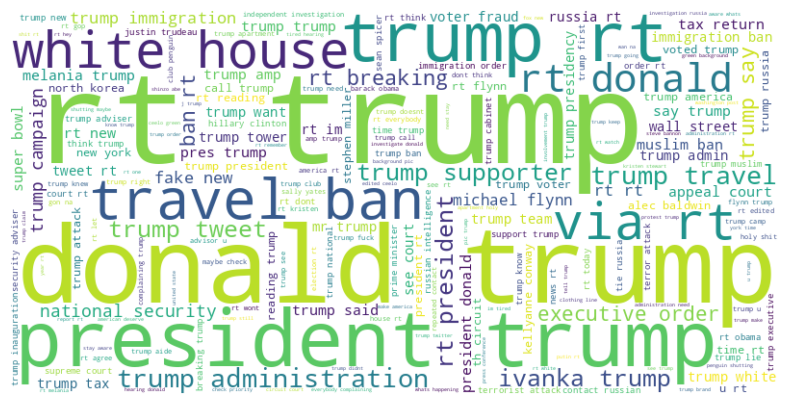

In [14]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned text into a single string
all_text = ' '.join(df['final_clean_text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()


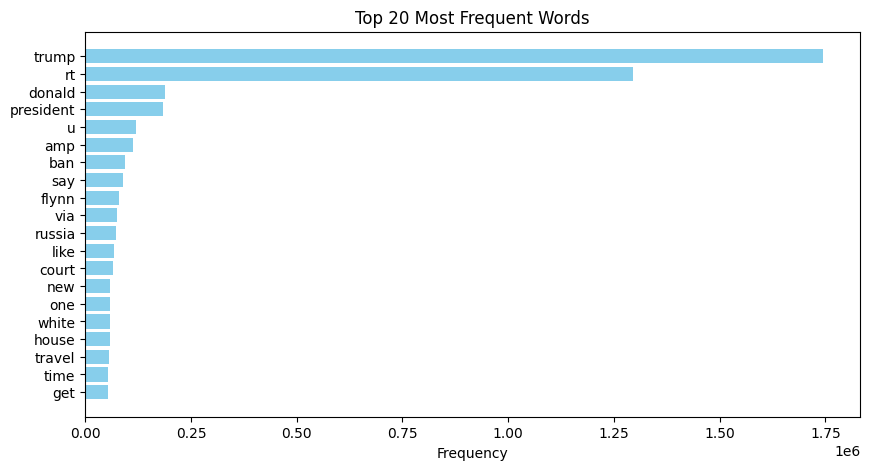

In [15]:
from collections import Counter

# Get word frequencies from the cleaned text
word_counts = Counter(" ".join(df['final_clean_text']).split())

# Get the top 20 most common words
top_words = word_counts.most_common(20)

# Extract words and their counts for plotting
words, counts = zip(*top_words)

# Create a horizontal bar plot for the top words
plt.figure(figsize=(10, 5))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis for better display
plt.show()


# Tokenization and Padding

In [16]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Encode sentiment if not binary
df['Sentiment'] = df['Sentiment'].replace({'positive': 1, 'negative': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['Sentiment'], test_size=0.2, random_state=42
)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding using 95th percentile
seq_lengths = [len(seq) for seq in X_train_seq]
max_len = int(np.percentile(seq_lengths, 95))

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

### Model Building

## RNN Model

In [17]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(64))
rnn_model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


## LSTM Model

In [18]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(64))
lstm_model.add(Dense(1, activation='sigmoid'))

# Training and Evaluation

In [19]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Compilation
model = lstm_model  # or rnn_model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history = model.fit(
    X_train_pad, y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=[checkpoint, early_stop]
)

Epoch 1/10
18501/18502 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9167 - loss: 0.2083

18502/18502 ━━━━━━━━━━━━━━━━━━━━ 922s 50ms/step - accuracy: 0.9167 - loss: 0.2083 - val_accuracy: 0.9604 - val_loss: 0.1150
Epoch 2/10
18502/18502 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9655 - loss: 0.1009

18502/18502 ━━━━━━━━━━━━━━━━━━━━ 944s 51ms/step - accuracy: 0.9655 - loss: 0.1009 - val_accuracy: 0.9675 - val_loss: 0.0980
Epoch 3/10
18502/18502 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9741 - loss: 0.0770

18502/18502 ━━━━━━━━━━━━━━━━━━━━ 963s 50ms/step - accuracy: 0.9741 - loss: 0.0770 - val_accuracy: 0.9706 - val_loss: 0.0920
Epoch 4/10
18502/18502 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9791 - loss: 0.0624

18502/18502 ━━━━━━━━━━━━━━━━━━━━ 970s 49ms/step - accuracy: 0.9791 - loss: 0.0624 - val_accuracy: 0.9715 - val_loss: 0.0898
Epoch 5/10
18502/18502 ━━━━━━━━━━━━━━━━━━━━ 908s 48ms/step - accuracy: 0.9828 - loss: 0.0514 - val_accuracy: 0.9708 - val_loss: 0.0915
Epoch 6/10
18502/18502 ━━━━━━━━━━━━━━━━━━━━ 947s 50ms/step - accuracy: 0.9857 - loss: 0.0433 - val_accuracy: 0.9714 - val_loss: 0.0961
Epoch 7/10
18502/18502 ━━━━━━━━━━━━━━━━━━━━ 978s 50ms/step - accuracy: 0.9879 - loss: 0.0367 - val_accuracy: 0.9710 - val_loss: 0.1012


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test_pad)
y_pred_classes = (y_pred > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_classes))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("Classification Report:\n", classification_report(y_test, y_pred_classes))

11564/11564 ━━━━━━━━━━━━━━━━━━━━ 79s 7ms/step
Accuracy: 0.9713046415782718
Confusion Matrix:
 [[242916   5647]
 [  4971 116491]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98    248563
           1       0.95      0.96      0.96    121462

    accuracy                           0.97    370025
   macro avg       0.97      0.97      0.97    370025
weighted avg       0.97      0.97      0.97    370025



# GUI

In [21]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 110.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [38]:
import gradio as gr
# Gradio Interface for Sentiment Analysis
import gradio as gr

def predict_sentiment(tweet):
    # Preprocess the input tweet
    processed = preprocess_text(tweet)
    sequence = tokenizer.texts_to_sequences([processed])
    padded = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Make prediction
    prediction = model.predict(padded)[0][0]

    # Determine sentiment
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction

    return f"Sentiment: {sentiment} (Confidence: {confidence:.2%})"

custom_css = """
@import url('https://fonts.googleapis.com/css2?family=Lato:wght@300;400;700&display=swap');

.gradio-container {
    font-family: 'Lato', sans-serif;
    background-color: #f4f1ee;
    padding: 30px;
    border-radius: 12px;
}

/* Title & Description */
h1, h2, p {
    color: #3e2f27 !important;
}

/* Textbox Input */
textarea, input[type="text"] {
    background-color: #ffffff !important;
    color: #333333 !important;
    border: 1px solid #d9cfc4 !important;
    border-radius: 10px;
    padding: 12px;
    font-size: 16px;
}

/* Buttons */
button {
    background-color: #7b4f3f !important;
    color: white !important;
    border: none;
    border-radius: 8px;
    padding: 12px 18px;
    font-size: 15px;
    transition: background-color 0.3s ease;
}
button:hover {
    background-color: #5c392e !important;
}

/* Output box */
.output-textbox, .output-textbox textarea {
    background-color: #fffaf6 !important;
    color: #222222 !important;
    font-weight: 500;
    border: 1px solid #d8c3b9 !important;
    border-radius: 10px;
    padding: 12px;
    font-size: 16px;
}

/* Example Texts */
.svelte-1ipelgc .examples .example,
.svelte-1ipelgc .examples .example span {
    color: #333333 !important;
    font-size: 15px;
}

/* General tweaks */
* {
    box-sizing: border-box;
}
"""


#interface
interface = gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(label="Enter your tweet", placeholder="Type your tweet here..."),
    outputs=gr.Textbox(label="Prediction"),
    title="📝 Simple Tweet Sentiment Analyzer",
    description="🔍 This model predicts whether a tweet is Positive or Negative.",
    examples=[
        ["I love this product! It's amazing!"],
        ["This is the worst experience I've ever had."],
        ["The weather today is just okay, nothing special."]
    ],
    css=custom_css,
    theme="default"
)

# Launch the interface
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4d7be34375b75b7091.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
